In [2]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

from PIL import Image
import os, glob, numpy as np
import pandas as pd
from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split

In [ ]:
mport torchvision
import matplotlib.pyplot as plt

one_image, label = train_dataset[0]
print("type of one image", type(one_image))
print("size of one image : ", one_image.shape)
plt.imshow(one_image.squeeze().numpy(), cmap='gray')
print("type of label : ", type(label))
print("label : ", label)

In [6]:
f

'./dataset/good/7ceae77f-3a56-4262-a271-2a8d727efbe9_45.jpg'

In [15]:
import PIL
import torchvision.transforms as transforms

img = PIL.Image.open(f)

tf = transforms.ToTensor()
img_t = tf(img)
print(img_t.size())


torch.Size([3, 467, 466])


In [4]:
img_dir = './dataset'
categories = ['bad', 'good']
np_classes = len(categories)

X = []
y = []

for idx, cat in enumerate(categories):
    
    img_dir_detail = img_dir + "/" + cat
    files = glob.glob(img_dir_detail+"/*.jpg")
    print(cat, " 파일 길이 : ", len(files))
    
    for i, f in enumerate(files):
        try:
            img = Image.open(f)      #폴더를 열어주고 이미지를 읽음
            img = img.convert("RGB")   #RGB로 바꿈
            r, g, b = img.split() # 각 쪼갠 이미지를 255로 나눠서 0~1 사이의 값이 나오도록 정규화한다.
            r_resize_img = np.asarray(np.float32(r) / 255.0)
            b_resize_img = np.asarray(np.float32(g) / 255.0)
            g_resize_img = np.asarray(np.float32(b) / 255.0)
            
            rgb_resize_img = np.asarray([r_resize_img, b_resize_img, g_resize_img]) # 이렇게 가공한 이미지를 추가한다.
            X.append(rgb_resize_img)
            y.append(idx) # 라벨 (ant: 0, bee: 1)
            if i % 700 == 0: #700으로 하면 폴더 명과 파일 길이를 더 
                print(cat, " : ", f)
        except:
            print(cat, str(i)+" 번째에서 에러 ")


X = np.array(X, dtype='float32')
y = np.array(y, dtype='int64')

#1 0  이면 bad
#0 1  이면 good

print("ok", len(y))

bad  파일 길이 :  434
bad  :  ./dataset/bad/4f08fc98-7d4d-43f7-921d-b2ccf8ca726d_270.jpg
good  파일 길이 :  1379
good  :  ./dataset/good/7ebb4762-7de4-4754-8cd2-2d4f743f512c_90.jpg
good  :  ./dataset/good/9eaca121-9239-49f4-9d05-34ef9f10bcaa_225.jpg


ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 2 dimensions. The detected shape was (1813, 3) + inhomogeneous part.

In [39]:
print(X)
print(y)

[[[[0.89411765 0.89411765 0.89411765 ... 0.75686276 0.75686276
    0.75686276]
   [0.8980392  0.8980392  0.8980392  ... 0.7764706  0.7764706
    0.7764706 ]
   [0.90588236 0.90588236 0.90588236 ... 0.7607843  0.7607843
    0.7607843 ]
   ...
   [0.76862746 0.76862746 0.76862746 ... 0.85490197 0.85490197
    0.85490197]
   [0.74509805 0.74509805 0.74509805 ... 0.8627451  0.8627451
    0.8627451 ]
   [0.7529412  0.7529412  0.7529412  ... 0.8666667  0.8666667
    0.8666667 ]]

  [[0.9254902  0.9254902  0.9254902  ... 0.7921569  0.7921569
    0.7921569 ]
   [0.9254902  0.9254902  0.9254902  ... 0.8117647  0.8117647
    0.8117647 ]
   [0.9411765  0.9411765  0.9411765  ... 0.79607844 0.79607844
    0.79607844]
   ...
   [0.7490196  0.7490196  0.7490196  ... 0.87058824 0.87058824
    0.87058824]
   [0.7254902  0.7254902  0.7254902  ... 0.8784314  0.8784314
    0.8784314 ]
   [0.73333335 0.73333335 0.73333335 ... 0.88235295 0.88235295
    0.88235295]]

  [[0.9647059  0.9647059  0.9647059  ... 

In [40]:
def train_val_test_split(X, y, train_size, val_size, test_size):
    X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size = test_size)
    relative_train_size = train_size / (val_size + train_size)
    X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val,
                                                      train_size = relative_train_size, test_size = 1-relative_train_size)
    return X_train, X_val, X_test, y_train, y_val, y_test

In [41]:
X_train, X_val, X_test, y_train, y_val, y_test = train_val_test_split(X,y,0.6,0.1,0.3)

In [42]:
X_train = torch.from_numpy(X_train).float()
X_val = torch.from_numpy(X_val).float()
X_test = torch.from_numpy(X_test).float()

y_train = torch.from_numpy(y_train).long()
y_val = torch.from_numpy(y_val).long()
y_test = torch.from_numpy(y_test).long()

In [43]:
train = TensorDataset(X_train, y_train)
val = TensorDataset(X_val, y_val)
test = TensorDataset(X_test, y_test)

In [44]:
print(X_train.shape)
print(X_val.shape)
print(X_test.shape)
print("------------")
print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

torch.Size([1087, 3, 128, 128])
torch.Size([182, 3, 128, 128])
torch.Size([544, 3, 128, 128])
------------
torch.Size([1087])
torch.Size([182])
torch.Size([544])


In [ ]:
'''
https://deep-learning-study.tistory.com/351

배치와 과적합 사이에 상관관계를 방지하기 위해 훈련 데이터를 섞는 것은 중요합니다.
 반면에 검증 손실은 검증 셋을 섞었는지 안섞었는지 동일합니다.
 따라서 데이터를 섞는 것은 추가 시간이 필요하기 때문에, 검증 데이터를 섞을 필요는 없습니다.

 훈련 셋의 배치 크기 2배로 검증 셋에 대한 배치 크기를 사용하겠습니다.
 검증 셋은 역전파가 필요없기 때문에 적은 메모리를 사용합니다.
 (기울기를 저장할 필요가 없기 때문입니다.)
 큰 배치 크기를 사용하는 이점으로 손실을 더 빨리 계산하겠습니다.
'''

In [45]:
train_loader = DataLoader(train, batch_size=32, shuffle=True, num_workers = 4)
val_loader = DataLoader(val, batch_size=32, shuffle=False, num_workers = 4)
test_loader = DataLoader(test, batch_size=32, shuffle=False, num_workers = 4)

In [ ]:
'''
단일 배치의 이미지 시각화 :
단일 배치의 이미지를 시각화하기 위해 torchvision 유틸리티에서 make_grid ()를 사용할 수 있습니다. 
이미지 그리드의 형태로 이미지를 일괄 적으로 전체적으로 볼 수 있습니다.
https://ichi.pro/ko/pytorchlo-cnn-model-hagseub-37224407207752
'''

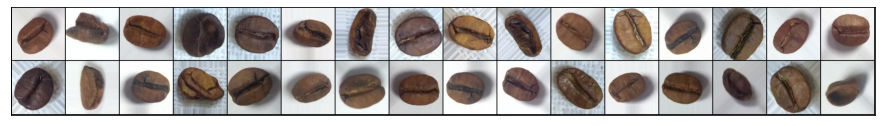

In [46]:
from torchvision.utils import make_grid
import matplotlib.pyplot as plt

def show_batch(dl):
    """Plot images grid of single batch"""
    for images, labels in dl:
        fig,ax = plt.subplots(figsize = (16,2))
        ax.set_xticks([])
        ax.set_yticks([])
        ax.imshow(make_grid(images,nrow=16).permute(1,2,0))
        break
        
show_batch(train_loader)

In [61]:
## https://bigdatadiary0819.tistory.com/54
## https://wingnim.tistory.com/34(참고)
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torchvision import transforms, datasets

USE_CUDA = torch.cuda.is_available()
DEVICE = torch.device("cuda" if USE_CUDA else "cpu")

class Net(nn.Module):
  def __init__(self):
    super(Net, self).__init__()
    # 합성곱층
    self.conv1 = nn.Conv2d(3, 10, 5) # 입력 채널 수, 출력 채널 수, 필터 크기
    self.conv2 = nn.Conv2d(10, 20, 5)

    # 전결합층
    self.fc1 = nn.Linear(20 * 29 * 29, 50) # 29=(((((128-5)+1)/2)-5)+1)/2
    self.dropout1 = nn.Dropout(p=0.2)
    self.fc2 = nn.Linear(50, 2)
    

  def forward(self, x):
    # 풀링층
    x = F.max_pool2d(F.relu(self.conv1(x)), 2) # 풀링 영역 크기
    x = F.max_pool2d(F.relu(self.conv2(x)), 2)
    x = x.view(-1, 20 * 29 * 29)
    x = F.relu(self.fc1(x))
    x = self.dropout1(x)
    x = self.fc2(x)
    return F.log_softmax(x)

# 인스턴스 생성
model = Net().to(DEVICE)
optimizer = optim.Adam(model.parameters(), lr=0.001)

EPOCHS = 50
BATCH_SIZE = 10

In [62]:
def train(model, train_loader, optimizer):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(DEVICE), target.to(DEVICE)
        optimizer.zero_grad()
        output = model(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()  

In [63]:
def evaluate(model, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(DEVICE), target.to(DEVICE)
            output = model(data)
            
            test_loss += F.cross_entropy(output, target, reduction = 'sum').item()
            
            pred = output.max(1, keepdim = True)[1]
            correct += pred.eq(target.view_as(pred)).sum().item()
            
    test_loss /= len(test_loader.dataset)
    test_accuracy = 100 *correct /len(test_loader.dataset)
    return test_loss, test_accuracy

for epoch in range(1, EPOCHS + 1):
    train(model, train_loader, optimizer)
    test_loss, test_accuracy = evaluate(model, test_loader)
    
    print('[{}] Test Loss: {:.4f}, Accuracy: {:.2f}%'
          .format(epoch, test_loss, test_accuracy))

<ipython-input-61-2792480aff6a>:32: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return F.log_softmax(x)


[1] Test Loss: 0.5014, Accuracy: 78.12%
[2] Test Loss: 0.4065, Accuracy: 79.60%
[3] Test Loss: 0.3740, Accuracy: 84.19%
[4] Test Loss: 0.3500, Accuracy: 87.50%
[5] Test Loss: 0.3611, Accuracy: 84.74%
[6] Test Loss: 0.3360, Accuracy: 88.05%
[7] Test Loss: 0.3278, Accuracy: 88.97%
[8] Test Loss: 0.3197, Accuracy: 88.60%
[9] Test Loss: 0.3047, Accuracy: 89.71%
[10] Test Loss: 0.3137, Accuracy: 89.15%
[11] Test Loss: 0.3191, Accuracy: 88.97%
[12] Test Loss: 0.3158, Accuracy: 89.52%
[13] Test Loss: 0.3723, Accuracy: 87.13%
[14] Test Loss: 0.3281, Accuracy: 87.68%
[15] Test Loss: 0.3453, Accuracy: 87.13%
[16] Test Loss: 0.2994, Accuracy: 89.34%
[17] Test Loss: 0.2974, Accuracy: 89.89%
[18] Test Loss: 0.3244, Accuracy: 88.97%
[19] Test Loss: 0.3079, Accuracy: 89.89%
[20] Test Loss: 0.3012, Accuracy: 90.26%
[21] Test Loss: 0.3126, Accuracy: 88.60%
[22] Test Loss: 0.3109, Accuracy: 88.42%
[23] Test Loss: 0.3198, Accuracy: 89.89%
[24] Test Loss: 0.3515, Accuracy: 87.32%
[25] Test Loss: 0.3843, A

In [ ]:
num_epochs = 30
opt_func = torch.optim.Adam
lr = 0.001
#fitting the model on training data and record the result after each epoch
history = fit(num_epochs, lr, model, train_dl, val_dl, opt_func)

In [ ]:
def plot_accuracies(history):
    """ Plot the history of accuracies"""
    accuracies = [x['val_acc'] for x in history]
    plt.plot(accuracies, '-x')
    plt.xlabel('epoch')
    plt.ylabel('accuracy')
    plt.title('Accuracy vs. No. of epochs');
    

plot_accuracies(history)

def plot_losses(history):
    """ Plot the losses in each epoch"""
    train_losses = [x.get('train_loss') for x in history]
    val_losses = [x['val_loss'] for x in history]
    plt.plot(train_losses, '-bx')
    plt.plot(val_losses, '-rx')
    plt.xlabel('epoch')
    plt.ylabel('loss')
    plt.legend(['Training', 'Validation'])
    plt.title('Loss vs. No. of epochs');

plot_losses(history)